# Laplace Likningen og Iterative Metoder

### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 2

En av de mest sentrale likningene i elektromagnetismen er Laplace likningen, $\nabla^2 V(x,y) = 0$, som beskriver det elektriske felt i vakuum. Denne øvingen handler om å løse Laplace likningen i 2 dimensjoner ved å bruke tre *iterative* metoder, Jacobi metoden,  Gauss-Seidel metoden, og SOR (Successive Over-Relaxation), samt å sammenlikne disse tre metodene. Det forventes kjennskap til numerisk derivasjon, samt bruk og plotting av 2-dimensjonale arrays.

### Oppgave 1: Iterative Metoder

En av de enklere systemene vi kan se på er en kvadratisk boks med lengde, $L$, hvor potensialet på den ene siden er holdt konstant, $V = V_0$, og den motsatte siden er jordet. I denne oppgaven velger vi periodiske grensebetingelser for de to gjenstående sidene, men det er også vanlig å la disse være jordet. For å finne potensialet inne i boksen må man dermed finne en løsning til Laplace likningen, $\nabla^2 V(x,y) = 0$, som oppfyller grensebetingelsene 

- $V(0,y) = V_0$,
- $V(L, y) = 0$,
- $V(x,0) = V(x,L)$.

Dette er en andreordens homogen partiell differensiallikning, og med de gitte grensebetingelsene er det garantert at det eksisterer en unik løsning inne i boksen.

Vi kan diskretisere systemet vårt ved å dele inn den kvadratiske boksen ved hjelp av et $N\times N$ (numerisk) kvadratisk gitter, der hvert punkt på gitteret gis en index $(i,j)$. Vi beskriver koordinater i gitteret ved $(x_i,y_j)$, for $i,j = 1,2,...,N$. På det diskret gitteret blir en gradient omgjort til en endelig forskjell (finite difference). For andre ordens deriverte har vi (for x-retning)

\begin{equation}
\frac{\partial^2 V}{\partial x^2} = \frac{V(x_{i-1},y_j) - 2V(x_i, y_j) + V(x_{i+1},y_j)}{(\Delta x)^2}
\end{equation}

Setter vi dette inn i Laplace ligning, ender vi opp med:

\begin{equation}
0 = \frac{V(x_{i-1},y_j) - 2V(x_i, y_j) + V(x_{i+1},y_j)}{(\Delta x)^2} + \frac{V(x_i,y_{j-1}) - 2V(x_i, y_j) + V(x_i,y_{j+1})}{(\Delta y)^2}
\end{equation}


Hvis vi setter $\Delta x = \Delta y$ får vi
\begin{equation}
V(x_i, y_j) = \frac{1}{4}\big[ V(x_{i-1},y_j) + V(x_{i+1},y_j) + V(x_i,y_{j-1}) + V(x_i,y_{j+1})\big]
\end{equation}
For å løse Laplace's ligning må vi altså løse denne ligningen for alle punkter på gitteret for gitte grensebetingelser. Vi skal nå studere tre itterative metoder for å løse den. 

I dette enkle tilfellet er den analytiske løsningen kjent, nemlig $V(x,y) = 1-x/L$ 

--------------

### Oppgave 1:

Den første metoden vi skal se på er Jacobi-metoden. Både Jacobi- og Gauss-Seidel metodene er i prinsippet for å løse matriselikninger av formen $A\vec{x} = \vec{b}$, men de kan omformuleres til å løse problemer som dette også (eller kanskje det vil være mer korrekt å si at dette problemet kan omformuleres til et matriseproblem). Jacobi-metoden er av de enkleste iterative metodene, og er utgangspunktet for Gauss-Seidel og SOR. 

Idéen bak iterative metoder er at man 'gjetter' en løsning, $V^{(0)}$, og ut fra metoden genererer en følge med approksimasjoner, $(V^{(\text{k})})$, som (forhåpentligvis) konvergerer mot riktig løsning. For Laplace likingen vil Jacobi-metoden gi følgende rekursjonsformel

\begin{equation}
V^{(\text{k}+1)}(x_i, y_j)= \frac{1}{4}\big[ V^{(\text{k})}(x_{i-1},y_j) + V^{(\text{k})}(x_{i+1},y_j) + V^{(\text{k})}(x_i,y_{j-1}) + V^{(\text{k})}(x_i,y_{j+1})\big]\text{.}
\end{equation}

$\textbf{a)}$ For en $40 \times 40$ grid, implementer Jacobi metoden på problemet ovenfor og iterer til $\vert \vert V^{(\text{k})}-V\vert \vert < 10^{-1}$ ved å bruke $\texttt{np.linalg.norm}$, der $V$ er den analytiske løsningen, $V = V(x,y) = 1-x/L$. Print antall steg og kjøretid før toleransen er oppnådd, og plot det resulterende potensialet som en heatmap. Merk at med periodiske grensebetingelser så må den første og siste raden håndteres separat fra de andre.

In [75]:
import numpy as np
import matplotlib.pyplot as  plt
import time
def V_anal(x,y):
    return 1-x/L

Antall iterasjoner som trengtes for toleranse: 0.1 var N = 691


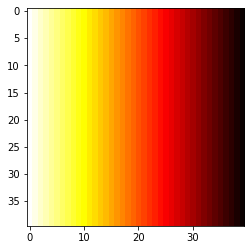

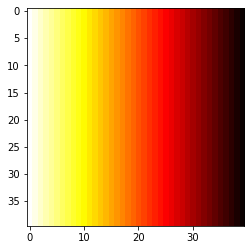

In [76]:
L = 1
N = 40
tol1 = 0.1
def jacobimethod(V,V_anal_grid,tol, Time = False):
    if Time: 
        t1 = {time.time()}
        print(f"Start tid: {t1}")
    V[0,:] = 1
    V[-1,:] = 0
    V_ny = V.copy() #NB: ASSIGNMENTOPERATOREN PÅ NUMPY ARRAY ER IN PLACE OG IKKE COPY
    limit = 10000
    error = 1
    count = 0
    while error > tol and count<limit: #Normen konvergerer ikke mot noe under 0.1 virker det som.
        for i in range(1,N-1):
            for j in range(1,N-1):
                V_ny[i][j] = (V[i+1][j]+V[i-1][j]+V[i][j+1]+V[i][j-1])/4
            V_ny[i][0] = V_ny[i][1]
            V_ny[i][-1] = V_ny[i][0]     
        error = np.linalg.norm(V_ny-V_anal_grid) #Fjerner error fra boundaries som skal være null
        
        V = V_ny.copy()
        count += 1
    if count>=limit:
        print(f"Countinglimit of {limit} reached")
    if Time:
        t2 = time.time()
        print(f"Slutt tid: {t2}")
    return V,count
V_guess_grid = np.zeros((N,N))
V_anal_grid = np.zeros((N,N))
for i in range(N): #konstruer analasytisk og v0 "gjett" som skal brukes i den resterende oppgaven
    for j in range(N):
        V_anal_grid[i][j] = V_anal(i*L/(N-1),0) #N-1 siden indekseringen starter på 0
        V_guess_grid[i][j] = 0.5
A,num = jacobimethod(V_guess_grid.copy(),V_anal_grid.copy(),tol1)

print(f"Antall iterasjoner som trengtes for toleranse: {tol1} var N = {num}")
plt.figure(0)
plt.imshow(np.transpose(V_anal_grid),cmap='hot')
plt.figure(1)
plt.imshow(np.transpose(A),cmap='hot')

---------

Gauss-Seidel metoden er nesten helt identisk Jacobi metoden, men er som regel et bedre valg siden den bruker mindre minne og vil ofte konvergere raskere. Forskjellen mellom de to metodene er at i Gauss-Seidel bruker man kun én array for $V$ og bruker de oppdaterte verdiene etterhvert som de blir beregnet i *samme* iterasjon, mens i Jacobi bruker man kun de gamle verdiene og trenger derfor to arrays for å lagre $V$, nemlig den 'gamle' $V^{(\text{k})}$ og den 'nye' $V^{(\text{k}+1)}$. Dette gir rekursjonsformelen

\begin{equation}
V^{(\text{k}+1)}(x_i, y_j)= \frac{1}{4}\big[ V^{(\text{k}+1)}(x_{i-1},y_j) + V^{(\text{k})}(x_{i+1},y_j) + V^{(\text{k}+1)}(x_i,y_{j-1}) + V^{(\text{k})}(x_i,y_{j+1})\big]\text{,}
\end{equation}

antatt at algoritmen går gjennom radene før kolonnene.

$\textbf{b)}$ For $i,j \in [0, 100]$, implementer Gauss-Seidel metoden på problemet ovenfor og iterer til $\vert \vert V^{(\text{k}+1)}-V^{(\text{k})}\vert \vert < 10^{-4}$ (dette betyr at du må lagre enda en array for 'gamle' $V$ verdier, vi velger å gjøre dette her for å sammenlikne med Jacobi metoden, men i praksis fins det bedre måter å teste toleransen på for Gauss-Seidel). Print antall steg og kjøretid, og plot potensialet som en 3d-surface.

Antall iterasjoner som trengtes for toleranse: 0.1 var N = 522


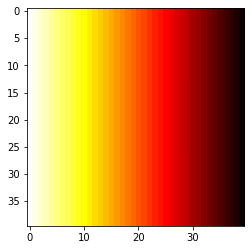

In [77]:
N = 40
tol2 = 10**(-4)
def gausseidel(V,V_anal_grid,tol, Time = False):
    if Time: 
        t1 = {time.time()}
        print(f"Start tid: {t1}")
    V[0,:] = 1
    V[-1,:] = 0
    limit = 10000
    error = 1
    count = 0
    while error > tol and count<limit:
        for i in range(1,N-1):
            for j in range(1,N-1):
                V[i][j] = (V[i+1][j]+V[i-1][j]+V[i][j+1]+V[i][j-1])/4
            V[i][0] = V[i][1]
            V[i][-1] = V[i][0]     
        error = np.linalg.norm(V-V_anal_grid) #Fjerner error fra boundaries som skal være null
        count += 1
    if count>=limit:
        print(f"Countinglimit of {limit} reached")
    if Time:
        t2 = {time.time()}
        print(f"Slutt tid: {t2}")
    return V,count


V_guess_grid = np.zeros((N,N))
V_anal_grid = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        V_anal_grid[i][j] = V_anal(i*L/(N-1),0)
        V_guess_grid[i][j] = 0.5
A,num = gausseidel(V_guess_grid.copy(),V_anal_grid.copy(),tol1)
# print(A,num)
print(f"Antall iterasjoner som trengtes for toleranse: {tol1} var N = {num}")
plt.figure(0)
# plt.imshow(V_anal_grid,cmap='hot')
plt.imshow(np.transpose(A),cmap='hot')


-------------

Successive Over-Relaxation (SOR) metoden er igjen nesten helt identisk med Gauss-Seidel, forskjellen er at man innfører en *relaxation parameter*, $\omega \in (0, 2)$, og bruker denne til å generere en rekursjonsformel med et veid gjennomsnitt

\begin{equation}
V^{(\text{k}+1)}(x_i, y_j)= (1 - \omega)V^{(\text{k})}(x_i, y_j) +  \frac{\omega}{4}\big[ V^{(\text{k}+1)}(x_{i-1},y_j) + V^{(\text{k})}(x_{i+1},y_j) + V^{(\text{k}+1)}(x_i,y_{j-1}) + V^{(\text{k})}(x_i,y_{j+1})\big]\text{,}
\end{equation}

basert på valg av $\omega$ kan dette føre til drastisk forbedring i konvergenshastighet.

$\textbf{c)}$ For $i,j \in [0, 100]$, implementer SOR metoden på problemet ovenfor med forskjellige valg av $\omega$, og iterer til $\vert \vert V^{(\text{k}+1)}-V^{(\text{k})}\vert \vert < 10^{-4}$. Print antall steg og kjøretid, og plot potensialet som en heatmap.

In [78]:
def SOR(V,V_anal_grid,tol,w,Time = False):
    if Time:
        t1 = {time.time()}
        print(f"Start tid: {t1}")
    V[0,:] = 1
    V[-1,:] = 0
    limit = 1000
    error = 1
    count = 0
    while error > tol and count<limit:
        for i in range(1,N-1):
            for j in range(1,N-1):
                V[i][j] = (V[i+1][j]+V[i-1][j]+V[i][j+1]+V[i][j-1])/4  * w + (1-w)*V[i][j]
            V[i][0] = V[i][1]
            V[i][-1] = V[i][0]     
        error = np.linalg.norm(V-V_anal_grid) #Fjerner error fra boundaries som skal være null
#         if count % (limit/10) == 0:
#             print(error)
        count += 1
    if count>=limit:
        print(f"Countinglimit of {limit} reached")
    if Time:
        t2 = {time.time()}
        print(f"Slutt tid: {t2}")
    return V,count

A,num = SOR(V_guess_grid.copy(),V_anal_grid.copy(),tol1,1) 
print(f"Antall iterasjoner som trengtes for toleranse: {tol1} var N = {num} og w = 1")
A,num = SOR(V_guess_grid.copy(),V_anal_grid.copy(),tol1,0.5)
print(f"Antall iterasjoner som trengtes for toleranse: {tol1} var N = {num} og w = 0.5")
A,num = SOR(V_guess_grid.copy(),V_anal_grid.copy(),tol1,1.5)
print(f"Antall iterasjoner som trengtes for toleranse: {tol1} var N = {num} og w = 1.5")
A,num = SOR(V_guess_grid.copy(),V_anal_grid.copy(),tol1,1.25)
print(f"Antall iterasjoner som trengtes for toleranse: {tol1} var N = {num} og w = 1.25")
A,num = SOR(V_guess_grid.copy(),V_anal_grid.copy(),tol1,1.75)
print(f"Antall iterasjoner som trengtes for toleranse: {tol1} var N = {num} og w = 1.75")
A,num = SOR(V_guess_grid.copy(),V_anal_grid.copy(),tol1,2)
print(f"Antall iterasjoner som trengtes for toleranse: {tol1} var N = {num} og w = 2")
A,num = SOR(V_guess_grid.copy(),V_anal_grid.copy(),tol1,1.99)
print(f"Antall iterasjoner som trengtes for toleranse: {tol1} var N = {num} og w = 1.99")
A,num = SOR(V_guess_grid.copy(),V_anal_grid.copy(),tol1,1.90)
print(f"Antall iterasjoner som trengtes for toleranse: {tol1} var N = {num} og w = 1.90")

Antall iterasjoner som trengtes for toleranse: 0.1 var N = 522 og w = 1
Countinglimit of 1000 reached
Antall iterasjoner som trengtes for toleranse: 0.1 var N = 1000 og w = 0.5
Antall iterasjoner som trengtes for toleranse: 0.1 var N = 299 og w = 1.5
Antall iterasjoner som trengtes for toleranse: 0.1 var N = 414 og w = 1.25
Antall iterasjoner som trengtes for toleranse: 0.1 var N = 180 og w = 1.75
Countinglimit of 1000 reached
Antall iterasjoner som trengtes for toleranse: 0.1 var N = 1000 og w = 2
Antall iterasjoner som trengtes for toleranse: 0.1 var N = 830 og w = 1.99
Antall iterasjoner som trengtes for toleranse: 0.1 var N = 100 og w = 1.90


--------------------------

### Ekstraoppgave: Jacobi-Metoden med Array Operasjoner

Når du implementerte Jacobi-metoden over brukte du sannsynligvis en enkel $\texttt{while}$ løkke for å iterere på hvert element i arrayen (eller kanskje du brukte array-operasjoner og oppdaget at Gauss-Seidel og SOR konvergerte enten omtrent like raskt eller mye tregere enn Jacobi). Dette er på mange måter den *naive* måten å implementere det, men egentlig helt nødvendig for å implementere Gauss-Seidel og SOR siden disse metodene må gå gjennom elementene én om gangen. Som en konsekvens av dette er faktisk Jacobi implementert med array-operasjoner mye raskere enn både Gauss-Seidel og SOR. Generelt når du skal utføre større operasjoner i Python er det en stor fordel å unngå å gjøre beregninger i Python, og heller gjøre så mye som mulig internt i $\texttt{numpy}$ og $\texttt{scipy}$ funksjoner eller som array operasjoner. Selv om operasjonene som utføres kanskje er helt identiske, så vil de utføres mye raskere i $\texttt{numpy}$ og $\texttt{scipy}$ (dette er siden $\texttt{numpy}$ og $\texttt{scipy}$ bibliotekene er skrevet i FORTRAN og varianter av C, som er raskere språk enn Python). 

$\textbf{a)}$ Implementer Jacobi-metoden ved å bruke $\texttt{numpy}$ arrays, og kjør til $\vert \vert V^{(\text{k})}-V\vert \vert < 10^{-1}$. Print antall steg og kjøretid, og plot potensialet som en 3d-surface. *Hint:* En nyttig funksjon her er $\texttt{numpy.roll(V, shift, axis)}$, f.eks. vil $\texttt{numpy.roll(V, 1, 0)}$ skifte posisjonene på alle radene ett hakk ned med periodiske betingelser (dvs. rad nummer 1 blir til rad nummer 2, rad nummer $N$ blir rad nummer 0, osv.). 

$\textbf{b)}$ I stedet for at potensialet ved $x=0$ holdes konstant, så kan problemet modifiseres for hvilken som helst $L$-periodisk funksjon $V(0, y) = V_0(y)$ brukes. Kravet er da kun at $V_0(y=0) = V_0(y=L)$ (merk at dette vil føre til et diskontinuerlig elektrisk felt, for et fysisk system med periodiske grensebetingelser hvor vi også ser på det elektriske feltet trenger vi også at den første-deriverte til $V_0(y)$ også er $L$-periodisk). 

Implementer Jacobi-metoden som beskrevet over for forskjellige $L$-periodiske funksjoner, $V_0(y)$, f.eks. $V_0(y) = e^y sin( \pi y / L)$ eller $V_0(y) = sin(2 \pi y / L)cos(\pi y / L)$. Iterer til $\vert \vert V^{(\text{k}+1)}-V^{(\text{k})}\vert \vert < 10^{-5}$, og plot det resulterende potensialet som en 3d-overflate.